In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DeS_df = pd.read_csv('GISdata/DeS_wells_w_knn_results.csv')

In [3]:
DeS_gdf = gpd.read_file('GISdata/DeS_wells_w_knn_results.shp')

In [9]:
DeS_gdf.head()

,index,id,amount_tsh,date_recor,funder,gps_height,installer,longitude,latitude,wpt_name,...,quantity_g,source,source_typ,source_cla,waterpoint,waterpoi_1,status_gro,original r,knn_final_,geometry
0,143,28669,50.0,2013-03-21,0,12,0,39.185710,-6.892593,Chekanao,...,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional,28669,functional,POINT (39.18571 -6.89259)
1,150,60983,0.0,2013-03-16,0,-15,0,39.527114,-6.988748,Msikitini,...,dry,machine dbh,borehole,groundwater,other,other,non functional,60983,functional,POINT (39.52711 -6.98875)
2,379,39749,0.0,2013-03-18,0,28,0,39.159887,-6.902548,Kwa Chambuso,...,unknown,machine dbh,borehole,groundwater,other,other,non functional,39749,non functional,POINT (39.15989 -6.90255)
3,403,15832,50.0,2013-03-22,0,30,0,39.178404,-6.938013,Ccm Kivule,...,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional,15832,functional,POINT (39.17840 -6.93801)
4,414,50233,0.0,2013-03-12,0,30,0,39.178849,-6.973206,Ofisi Ya Kata,...,dry,shallow well,shallow well,groundwater,other,other,non functional,50233,non functional,POINT (39.17885 -6.97321)


In [4]:
tanzania = gpd.read_file('tanzania_shapefile/stanford-ts107jn3602-geojson.json')
DeS = tanzania[tanzania['name_1']=='Dar es Salaam']

In [11]:
DeS.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
DeS_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

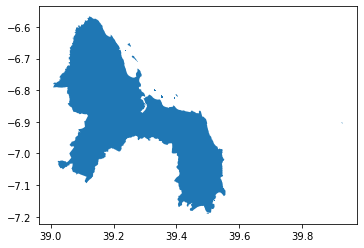

In [13]:
DeS.plot()

<AxesSubplot:>

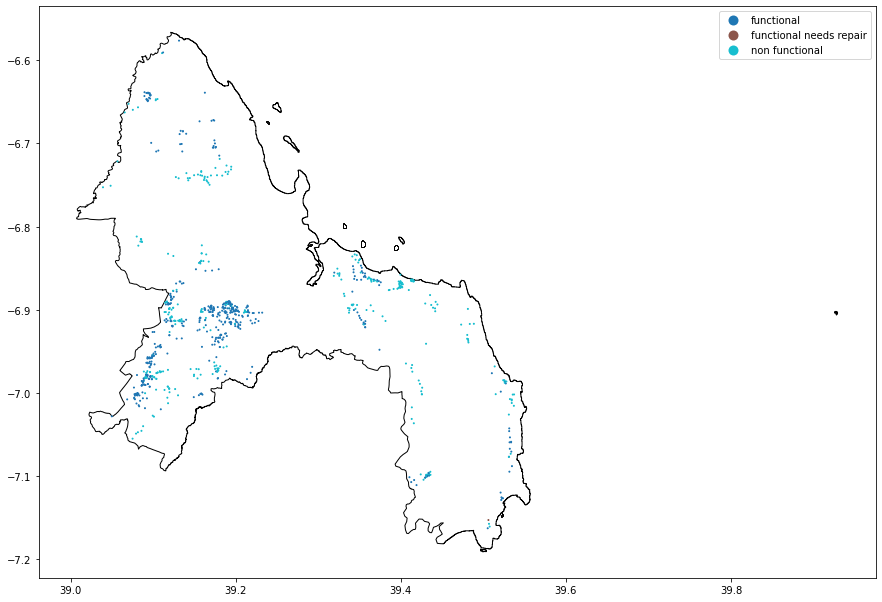

In [15]:

ax = DeS.plot(color='white', edgecolor='black', figsize = (15,15))
DeS_gdf.plot(column='knn_final_', ax=ax, legend= True,markersize=1)


In [17]:
well_palette = {'functional': 'seagreen',
               'functional needs repair': 'gold',
               'non functional': 'firebrick'}

In [23]:
DeS_gdf['different'] = (DeS_gdf['status_gro'] == DeS_gdf['knn_final_']).astype(int)
DeS_gdf.head()

,index,id,amount_tsh,date_recor,funder,gps_height,installer,longitude,latitude,wpt_name,...,source,source_typ,source_cla,waterpoint,waterpoi_1,status_gro,original r,knn_final_,geometry,different
0,143,28669,50.0,2013-03-21,0,12,0,39.185710,-6.892593,Chekanao,...,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional,28669,functional,POINT (39.18571 -6.89259),1
1,150,60983,0.0,2013-03-16,0,-15,0,39.527114,-6.988748,Msikitini,...,machine dbh,borehole,groundwater,other,other,non functional,60983,functional,POINT (39.52711 -6.98875),0
2,379,39749,0.0,2013-03-18,0,28,0,39.159887,-6.902548,Kwa Chambuso,...,machine dbh,borehole,groundwater,other,other,non functional,39749,non functional,POINT (39.15989 -6.90255),1
3,403,15832,50.0,2013-03-22,0,30,0,39.178404,-6.938013,Ccm Kivule,...,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional,15832,functional,POINT (39.17840 -6.93801),0
4,414,50233,0.0,2013-03-12,0,30,0,39.178849,-6.973206,Ofisi Ya Kata,...,shallow well,shallow well,groundwater,other,other,non functional,50233,non functional,POINT (39.17885 -6.97321),1


In [26]:
DeS_gdf['dif_color'] = DeS_gdf['different'].apply(lambda x: 'seagreen' if x else 'brick')
DeS_gdf.head()

,index,id,amount_tsh,date_recor,funder,gps_height,installer,longitude,latitude,wpt_name,...,source_typ,source_cla,waterpoint,waterpoi_1,status_gro,original r,knn_final_,geometry,different,dif_color
0,143,28669,50.0,2013-03-21,0,12,0,39.185710,-6.892593,Chekanao,...,borehole,groundwater,communal standpipe,communal standpipe,functional,28669,functional,POINT (39.18571 -6.89259),1,seagreen
1,150,60983,0.0,2013-03-16,0,-15,0,39.527114,-6.988748,Msikitini,...,borehole,groundwater,other,other,non functional,60983,functional,POINT (39.52711 -6.98875),0,brick
2,379,39749,0.0,2013-03-18,0,28,0,39.159887,-6.902548,Kwa Chambuso,...,borehole,groundwater,other,other,non functional,39749,non functional,POINT (39.15989 -6.90255),1,seagreen
3,403,15832,50.0,2013-03-22,0,30,0,39.178404,-6.938013,Ccm Kivule,...,borehole,groundwater,communal standpipe,communal standpipe,non functional,15832,functional,POINT (39.17840 -6.93801),0,brick
4,414,50233,0.0,2013-03-12,0,30,0,39.178849,-6.973206,Ofisi Ya Kata,...,shallow well,groundwater,other,other,non functional,50233,non functional,POINT (39.17885 -6.97321),1,seagreen


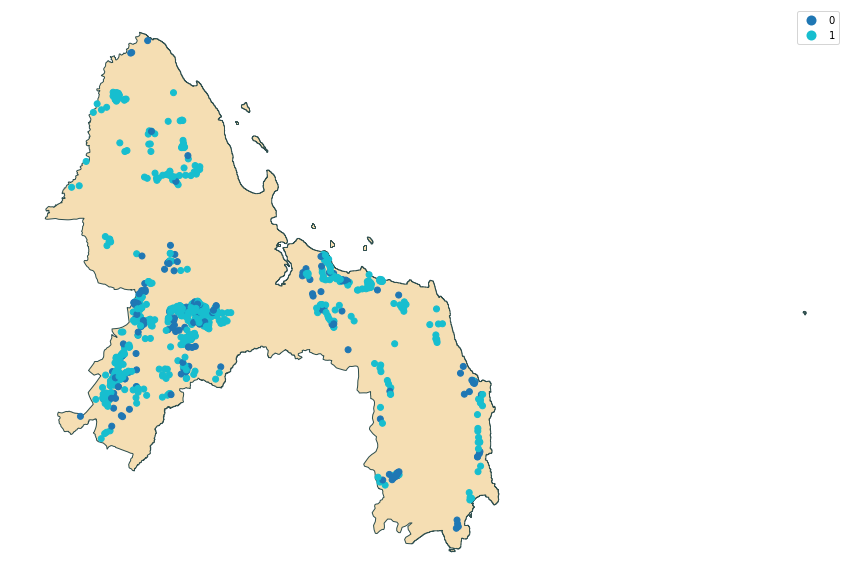

In [30]:
from matplotlib.lines import Line2D  # for legend handle

fig, ax = plt.subplots(figsize=(15,15))

DeS.plot(color='wheat', edgecolor='darkslategrey', ax=ax)

DeS_gdf.plot(column='different',
             categorical=True,
             legend=True,
             ax=ax)


# add a legend
# handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in well_palette.items()]
# ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()
# Adjust legend location
# leg = ax.get_legend()
# leg.set_bbox_to_anchor((1.15,0.5))
# plt.legend(['simple legend example']) 
# pop_a = mpatches.Patch(color='#5DC83F', label='Population Dataset 1')
# pop_b = mpatches.Patch(color='#CE5D45', label='Population Dataset 2')
# plt.legend(handles=[pop_a,pop_b])
  
ax.set_axis_off()

plt.show()

In [109]:

# full_gdf.to_file('GISdata/X_y_train_gdf.shp')

C:\Users\alexm\AppData\Local\Temp/ipykernel_14848/2348627744.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  full_gdf.to_file('GISdata/X_y_train_gdf.shp')


In [6]:
tanzania.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         30 non-null     object  
 1   id_0       30 non-null     int64   
 2   iso        30 non-null     object  
 3   name_0     30 non-null     object  
 4   id_1       30 non-null     int64   
 5   name_1     30 non-null     object  
 6   hasc_1     30 non-null     object  
 7   ccn_1      30 non-null     int64   
 8   cca_1      30 non-null     object  
 9   type_1     30 non-null     object  
 10  engtype_1  30 non-null     object  
 11  nl_name_1  0 non-null      object  
 12  varname_1  6 non-null      object  
 13  geometry   30 non-null     geometry
dtypes: geometry(1), int64(3), object(10)
memory usage: 3.4+ KB


KeyError: 'knn_final_'

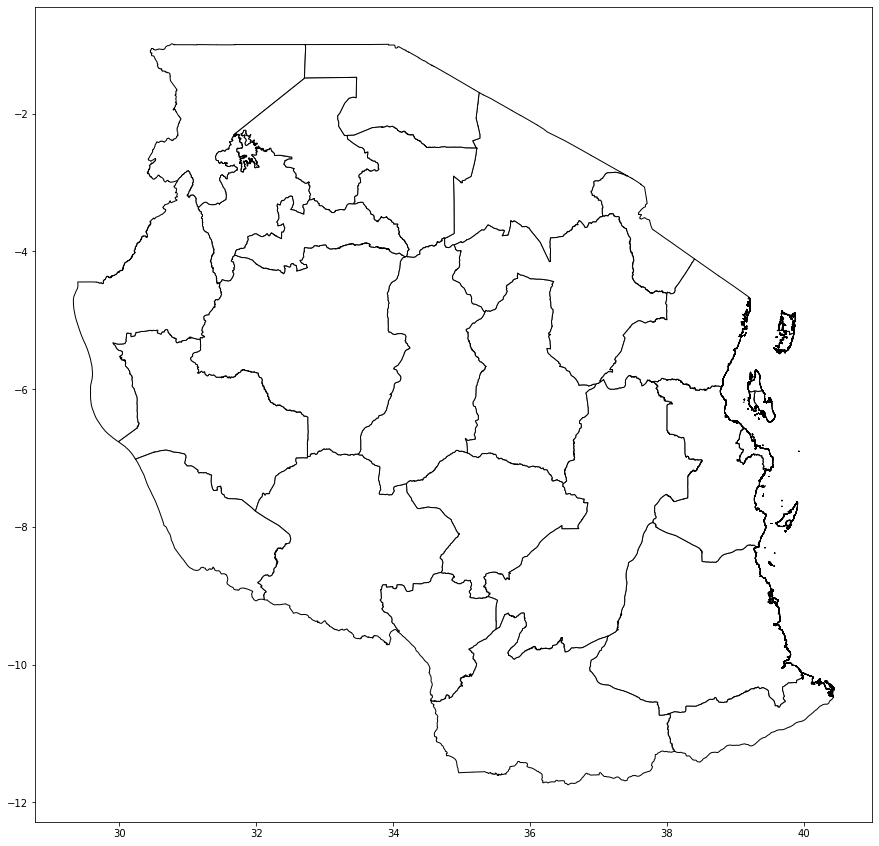

In [5]:
tanzania.plot(column='knn_final_', legend= True,markersize=1)